In [1]:
!pip3 install torch

You are using pip version 19.0.2, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

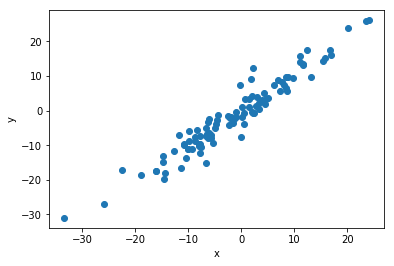

In [15]:
X = torch.randn(100, 1)*10
y = X + 3*torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

In [16]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [17]:
torch.manual_seed(1)
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [18]:
[w, b] = model.parameters()
def get_params():
  return (w[0][0].item(), b[0].item())

In [19]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

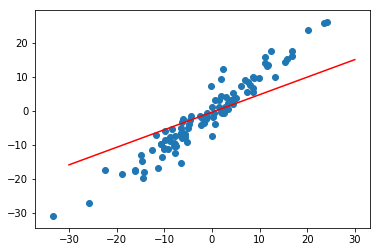

In [20]:
plot_fit('Initial Model')

In [25]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [26]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("epoch:", i, "loss:", loss.item())
  
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 8.412287712097168
epoch: 1 loss: 8.411371231079102
epoch: 2 loss: 8.410490036010742
epoch: 3 loss: 8.409643173217773
epoch: 4 loss: 8.408828735351562
epoch: 5 loss: 8.40804672241211
epoch: 6 loss: 8.407294273376465
epoch: 7 loss: 8.406572341918945
epoch: 8 loss: 8.405877113342285
epoch: 9 loss: 8.4052095413208
epoch: 10 loss: 8.40456771850586
epoch: 11 loss: 8.403950691223145
epoch: 12 loss: 8.40335750579834
epoch: 13 loss: 8.402788162231445
epoch: 14 loss: 8.402240753173828
epoch: 15 loss: 8.401714324951172
epoch: 16 loss: 8.40120792388916
epoch: 17 loss: 8.400721549987793
epoch: 18 loss: 8.400254249572754
epoch: 19 loss: 8.399805068969727
epoch: 20 loss: 8.399373054504395
epoch: 21 loss: 8.398958206176758
epoch: 22 loss: 8.3985595703125
epoch: 23 loss: 8.398176193237305
epoch: 24 loss: 8.397807121276855
epoch: 25 loss: 8.397453308105469
epoch: 26 loss: 8.397112846374512
epoch: 27 loss: 8.396785736083984
epoch: 28 loss: 8.39647102355957
epoch: 29 loss: 8.39616870880127


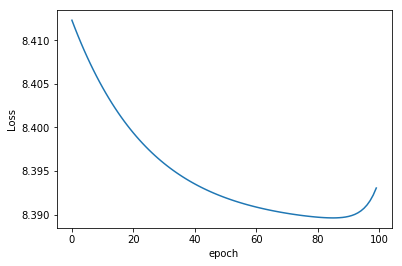

In [27]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

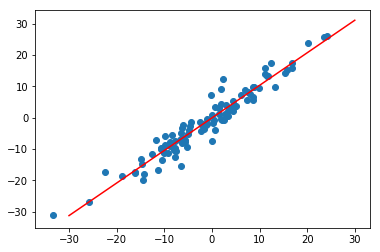

In [28]:
plot_fit("Trained Model")